In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

In [2]:
df=pd.read_csv("Synnax Kaggle 1 Train.csv")

In [3]:
df.head()

,quarter_day_label,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,...,q3_83,q3_84,q3_85,q3_86,q3_87,q3_88,q3_89,q3_90,q3_91,q3_92
0,tax_effect_of_unusual_items,-92628,-86829,-75074,-79744,-93119,-83990,-72336,-72778,-65196,...,-17697,-22915,-21247,-20581,-17364,-22588,-21463,-23010,-20692,-15048
1,reconciled_depreciation,249593,295426,284126,255778,298705,257857,222372,278122,215063,...,812859,652658,683840,717615,583314,684132,699633,732228,662322,1777417
2,reconciled_cost_of_revenue,726156,617270,550131,609768,628772,614452,576283,525452,563534,...,678462,582796,581133,581931,625793,520602,506575,593623,695095,328903
3,net_interest_income,0,0,0,0,0,0,0,0,0,...,45241,45241,45241,0,0,0,0,0,0,0
4,interest_income,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df=df.transpose()

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
quarter_day_label,tax_effect_of_unusual_items,reconciled_depreciation,reconciled_cost_of_revenue,net_interest_income,interest_income,total_expenses,tax_provision,other_income_expense,other_non_operating_income_expenses,special_income_charges,...,current_deferred_revenue,current_capital_lease_obligation,pensionand_other_post_retirement_benefit_plans...,payables_and_accrued_expenses,current_accrued_expenses,accounts_payable,other_non_current_assets,non_current_prepaid_assets,financial_assets,other_intangible_assets
q1_1,-92628,249593,726156,0,0,1105282,-69538,-4303428,75224,-6283549,...,13220399,1389204,5900799,64347348,40783752,14927002,356500,0,167327302,20163749
q1_2,-86829,295426,617270,0,0,998330,-67355,-5002715,59177,-5938779,...,13189016,1393163,5876728,64044908,40503402,15000866,356500,0,167138077,20239479
q1_3,-75074,284126,550131,0,0,1145334,-75659,-5049685,83940,-5030053,...,13157638,1397118,5852658,63742476,40223057,15074740,356500,0,166948853,20315200
q1_4,-79744,255778,609768,0,0,850817,-85769,-4546880,83963,-5776491,...,13126250,1401084,5828576,63440039,39942713,15148605,356500,0,166759628,20390928


In [6]:
df.columns=df.iloc[0]

In [7]:
df.columns

Index(['tax_effect_of_unusual_items', 'reconciled_depreciation',
       'reconciled_cost_of_revenue', 'net_interest_income', 'interest_income',
       'total_expenses', 'tax_provision', 'other_income_expense',
       'other_non_operating_income_expenses', 'special_income_charges',
       'other_special_charges', 'write_off', 'impairment_of_capital_assets',
       'restructuring_and_m&a', 'gain_on_sale_of_security',
       'net_non_operating_interest_income_expense', 'total_other_finance_cost',
       'interest_income_non_operating',
       'depreciation_and_amortization_in_income_statement',
       'selling_general_and_administration', 'cost_of_revenue',
       'total_revenue', 'invested_capital', 'working_capital',
       'capital_lease_obligations', 'retained_earnings', 'common_stock',
       'other_non_current_liabilities', 'derivative_product_liabilities',
       'non_current_deferred_revenue', 'long_term_capital_lease_obligation',
       'other_current_liabilities', 'current_defer

In [8]:
df = df[1:]

In [9]:
df

quarter_day_label,tax_effect_of_unusual_items,reconciled_depreciation,reconciled_cost_of_revenue,net_interest_income,interest_income,total_expenses,tax_provision,other_income_expense,other_non_operating_income_expenses,special_income_charges,...,current_deferred_revenue,current_capital_lease_obligation,pensionand_other_post_retirement_benefit_plans_current,payables_and_accrued_expenses,current_accrued_expenses,accounts_payable,other_non_current_assets,non_current_prepaid_assets,financial_assets,other_intangible_assets
q1_1,-92628,249593,726156,0,0,1105282,-69538,-4303428,75224,-6283549,...,13220399,1389204,5900799,64347348,40783752,14927002,356500,0,167327302,20163749
q1_2,-86829,295426,617270,0,0,998330,-67355,-5002715,59177,-5938779,...,13189016,1393163,5876728,64044908,40503402,15000866,356500,0,167138077,20239479
q1_3,-75074,284126,550131,0,0,1145334,-75659,-5049685,83940,-5030053,...,13157638,1397118,5852658,63742476,40223057,15074740,356500,0,166948853,20315200
q1_4,-79744,255778,609768,0,0,850817,-85769,-4546880,83963,-5776491,...,13126250,1401084,5828576,63440039,39942713,15148605,356500,0,166759628,20390928
q1_5,-93119,298705,628772,0,0,931185,-73783,-3972094,61068,-6163793,...,13094873,1405046,5804494,63137588,39662367,15222478,356500,0,166570394,20466652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q3_88,-22588,684132,520602,0,0,1343109,-37514,-1199176,89281,-803749,...,13151345,2294681,9697834,85163247,64243722,20919526,356500,10534000,113603844,35955708
q3_89,-21463,699633,506575,0,0,1731310,-31230,-1210180,80986,-1137209,...,13120309,2298596,9740699,85528947,64536369,20992579,356500,10534000,113416690,36063573
q3_90,-23010,732228,593623,0,0,1612524,-41239,-990986,83684,-1128129,...,13089265,2302514,9783570,85894647,64829018,21065637,356500,10534000,113229541,36171429
q3_91,-20692,662322,695095,0,0,1682582,-38841,-911687,60535,-1119492,...,13058226,2306434,9826437,86260349,65121663,21138693,356500,10534000,113042402,36279285


In [10]:
df.tail()

quarter_day_label,tax_effect_of_unusual_items,reconciled_depreciation,reconciled_cost_of_revenue,net_interest_income,interest_income,total_expenses,tax_provision,other_income_expense,other_non_operating_income_expenses,special_income_charges,...,current_deferred_revenue,current_capital_lease_obligation,pensionand_other_post_retirement_benefit_plans_current,payables_and_accrued_expenses,current_accrued_expenses,accounts_payable,other_non_current_assets,non_current_prepaid_assets,financial_assets,other_intangible_assets
q3_88,-22588,684132,520602,0,0,1343109,-37514,-1199176,89281,-803749,...,13151345,2294681,9697834,85163247,64243722,20919526,356500,10534000,113603844,35955708
q3_89,-21463,699633,506575,0,0,1731310,-31230,-1210180,80986,-1137209,...,13120309,2298596,9740699,85528947,64536369,20992579,356500,10534000,113416690,36063573
q3_90,-23010,732228,593623,0,0,1612524,-41239,-990986,83684,-1128129,...,13089265,2302514,9783570,85894647,64829018,21065637,356500,10534000,113229541,36171429
q3_91,-20692,662322,695095,0,0,1682582,-38841,-911687,60535,-1119492,...,13058226,2306434,9826437,86260349,65121663,21138693,356500,10534000,113042402,36279285
q3_92,-15048,1777417,328903,0,0,1277671,-45369,-2144198,110173,-1554693,...,13027200,2310350,9869300,86626050,65414300,21211750,356500,10534000,112855250,36387150


In [11]:
df1=df

In [12]:
df1["Date"]=pd.date_range("04/01/2022", datetime.strptime("01/01/2023", "%d/%m/%Y") - timedelta(days=1), freq='d')

In [14]:
columns = df1.columns.tolist()
columns = [columns[-1]] + columns[:-1]
df1 = df1[columns]


In [15]:
df1["net_interest_income"].unique()

array([0, '0', 40020, 45241], dtype=object)

In [16]:
df1["net_interest_income"].value_counts()

net_interest_income
0        244
40020     12
45241     10
0          9
Name: count, dtype: int64

In [ ]:
df1["net_interest_income"].dtype

In [ ]:
for col in df1.columns:
    if df1[col].dtype=='O':
        print(col)

In [38]:
from ydata_profiling import ProfileReport

In [53]:
profile = ProfileReport(df1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df1.head(15)

quarter_day_label,Date,tax_effect_of_unusual_items,reconciled_depreciation,reconciled_cost_of_revenue,net_interest_income,interest_income,total_expenses,tax_provision,other_income_expense,other_non_operating_income_expenses,...,current_deferred_revenue,current_capital_lease_obligation,pensionand_other_post_retirement_benefit_plans_current,payables_and_accrued_expenses,current_accrued_expenses,accounts_payable,other_non_current_assets,non_current_prepaid_assets,financial_assets,other_intangible_assets
q1_1,2022-04-01,-92628,249593,726156,0,0,1105282,-69538,-4303428,75224,...,13220399,1389204,5900799,64347348,40783752,14927002,356500,0,167327302,20163749
q1_2,2022-04-02,-86829,295426,617270,0,0,998330,-67355,-5002715,59177,...,13189016,1393163,5876728,64044908,40503402,15000866,356500,0,167138077,20239479
q1_3,2022-04-03,-75074,284126,550131,0,0,1145334,-75659,-5049685,83940,...,13157638,1397118,5852658,63742476,40223057,15074740,356500,0,166948853,20315200
q1_4,2022-04-04,-79744,255778,609768,0,0,850817,-85769,-4546880,83963,...,13126250,1401084,5828576,63440039,39942713,15148605,356500,0,166759628,20390928
q1_5,2022-04-05,-93119,298705,628772,0,0,931185,-73783,-3972094,61068,...,13094873,1405046,5804494,63137588,39662367,15222478,356500,0,166570394,20466652
q1_6,2022-04-06,-83990,257857,614452,0,0,1091206,-75728,-3714451,71845,...,13063494,1409006,5780434,62835152,39382020,15296344,356500,0,166381169,20542372
q1_7,2022-04-07,-72336,222372,576283,0,0,1130528,-80601,-5359758,65798,...,13032112,1412970,5756347,62532709,39101671,15370214,356500,0,166191945,20618104
q1_8,2022-04-08,-72778,278122,525452,0,0,835588,-82771,-4403803,71266,...,13000730,1416931,5732290,62230273,38821329,15444083,356500,0,166002719,20693821
q1_9,2022-04-09,-65196,215063,563534,0,0,1141611,-79117,-4086827,73146,...,12969343,1420887,5708198,61927829,38540992,15517947,356500,0,165813493,20769544
q1_10,2022-04-10,-72797,266066,672402,0,0,917951,-88847,-4932708,70750,...,12937964,1424854,5684130,61625393,38260634,15591811,356500,0,165624265,20845273


In [22]:
tax_effect=df1.iloc[:,0:2]

In [20]:
df1=df1.reset_index(drop=True)

In [23]:
tax_effect

quarter_day_label,Date,tax_effect_of_unusual_items
0,2022-04-01,-92628
1,2022-04-02,-86829
2,2022-04-03,-75074
3,2022-04-04,-79744
4,2022-04-05,-93119
...,...,...
270,2022-12-27,-22588
271,2022-12-28,-21463
272,2022-12-29,-23010
273,2022-12-30,-20692


In [24]:
tax_effect=tax_effect.set_index("Date")


In [26]:
tax_effect.columns

Index(['tax_effect_of_unusual_items'], dtype='object', name='quarter_day_label')

In [27]:
tax_effect.describe()

quarter_day_label,tax_effect_of_unusual_items
count,275
unique,274
top,-18596
freq,2


In [33]:
tax_effect.tax_effect_of_unusual_items.unique()

array([-92628, -86829, -75074, -79744, -93119, -83990, -72336, -72778,
       -65196, -72797, -77334, '-71,438.00', '-89,418.00', -62615, -92183,
       -81452, '-66696', '-66978', '-73042', -90031, -64674, -87583,
       -87795, -68081, -80920, -63668, -73007, -81741, -80012, -77110,
       -63344, -87933, -67898, -87905, -86527, -77188, -73297, -85540,
       -78129, -88728, -77344, -82052, -89137, -74976, -88585, -84260,
       -74084, -75350, -87012, -71508, -63542, -85885, -90110, -86438,
       -85230, -87020, -68122, -78467, -85961, -78825, -72296, -68387,
       -71089, -78512, -79758, -73939, -76157, -70370, -89462, -82132,
       -83775, -70791, -69150, -66627, -78596, -92839, -83035, -92209,
       -93258, -66007, -83842, -78124, -79551, -63219, -65347, -85527,
       -65089, -75876, -72483, -66447, -74484, -14935, -14420, -15245,
       -13882, -10657, -14735, -15040, -13205, -11368, -12005, -12493,
       -12979, -11058, -15483, -12731, -10972, -12865, -13935, -14199,
    

In [49]:
tax_effect["tax_effect_of_unusual_items"] = tax_effect["tax_effect_of_unusual_items"].replace({',': ''}, regex=True).astype(float)

In [50]:
tax_effect["tax_effect_of_unusual_items"]=tax_effect["tax_effect_of_unusual_items"].astype('int64')

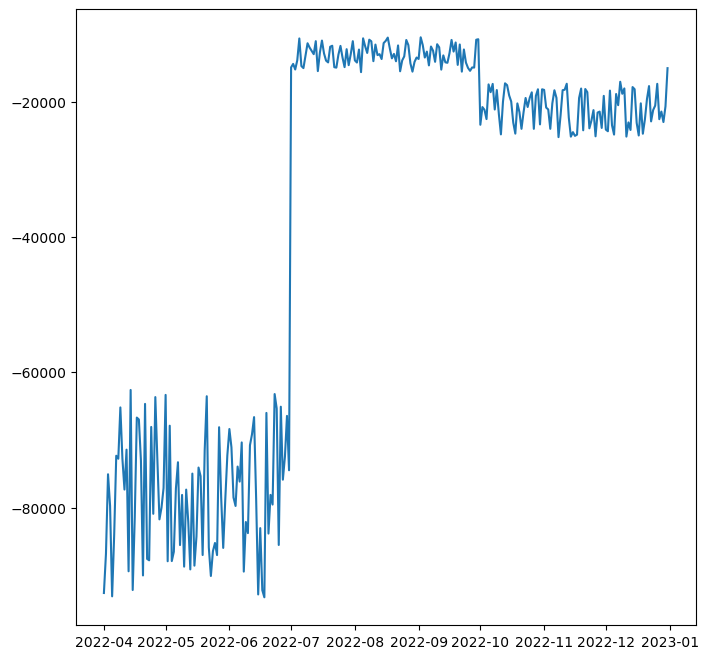

In [51]:
plt.figure(figsize=(8,8))
plt.plot(tax_effect.tax_effect_of_unusual_items)

(array([ 27.,  24.,  22.,  18.,   0.,   0.,   0.,   0.,  67., 117.]),
 array([-93258. , -84980.5, -76703. , -68425.5, -60148. , -51870.5,
        -43593. , -35315.5, -27038. , -18760.5, -10483. ]),
 <BarContainer object of 10 artists>)

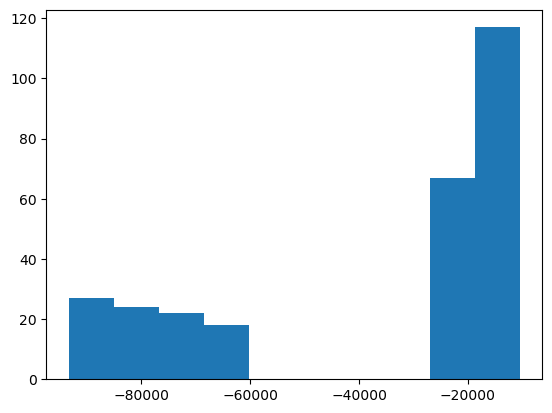

In [53]:
plt.hist(tax_effect["tax_effect_of_unusual_items"])

In [56]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(tax_effect["tax_effect_of_unusual_items"])

In [57]:
adf

(-1.650100722449967,
 0.4569878955364548,
 12,
 262,
 {'1%': -3.455558114028747,
  '5%': -2.872635586277424,
  '10%': -2.572682677000175},
 5300.372758324883)

In [58]:
pd.Series(adf[0:4],index=["test stats","p-value","lag","data point"])

test stats     -1.650101
p-value         0.456988
lag            12.000000
data point    262.000000
dtype: float64

In [59]:
# if p-value > 0.05 it is non stationary

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(tax_effect["tax_effect_of_unusual_items"],model="additive",period=1)

<Figure size 1800x800 with 0 Axes>

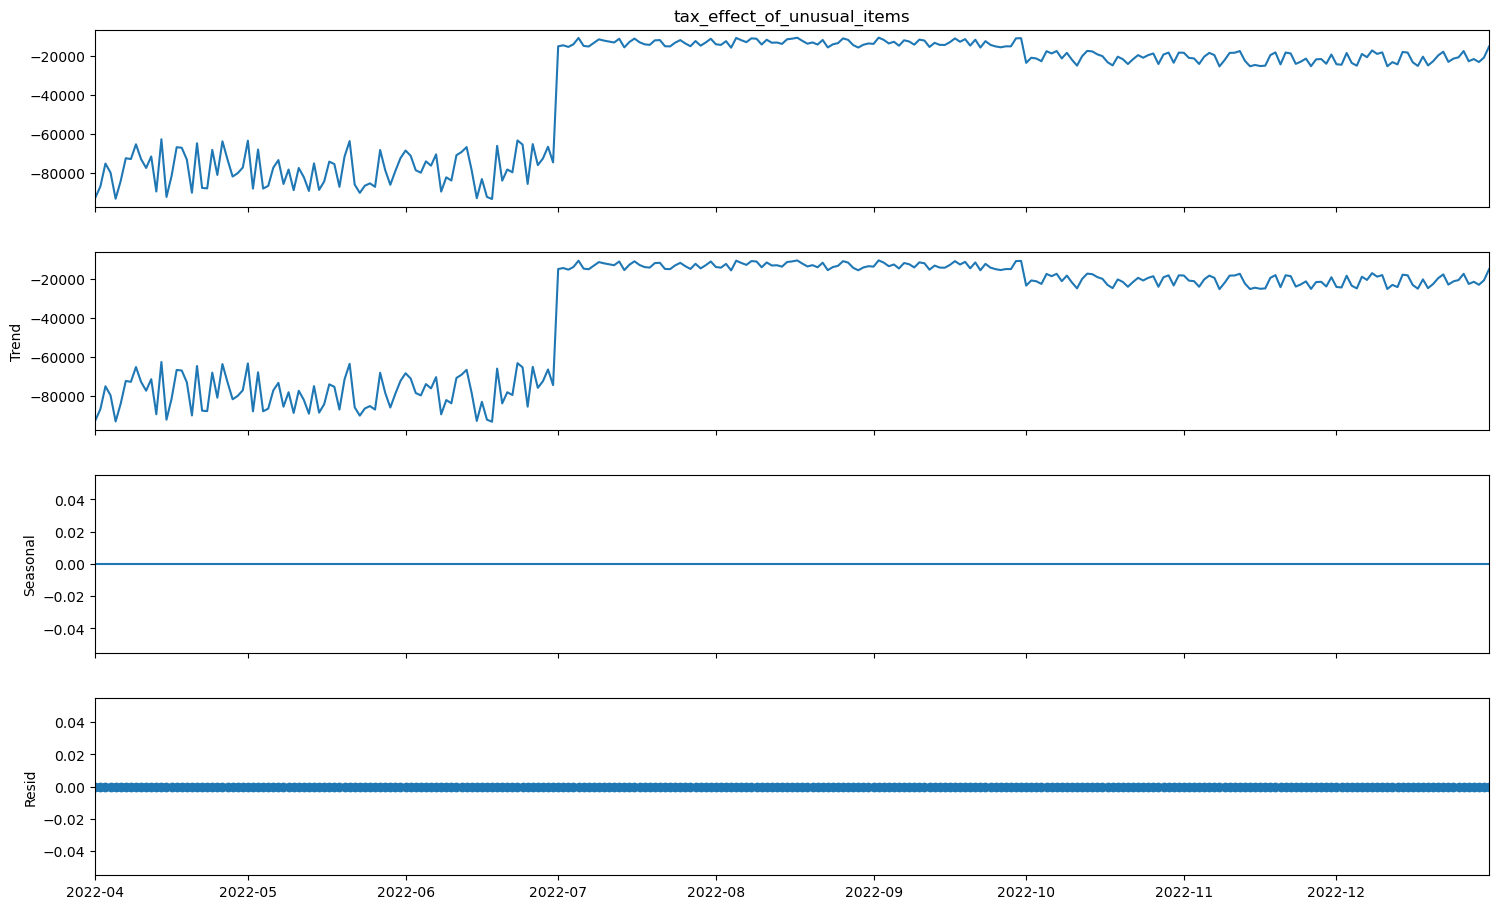

In [62]:
plt.figure(figsize=(18,8))
fig=result.plot()
fig.set_size_inches(17,10)

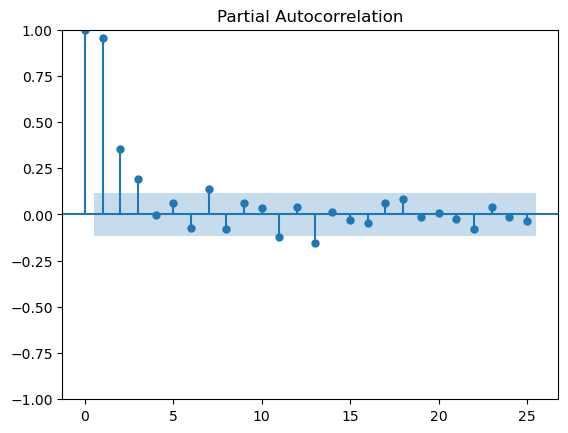

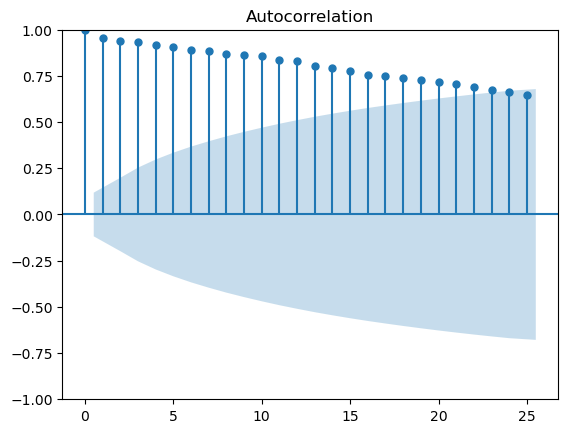

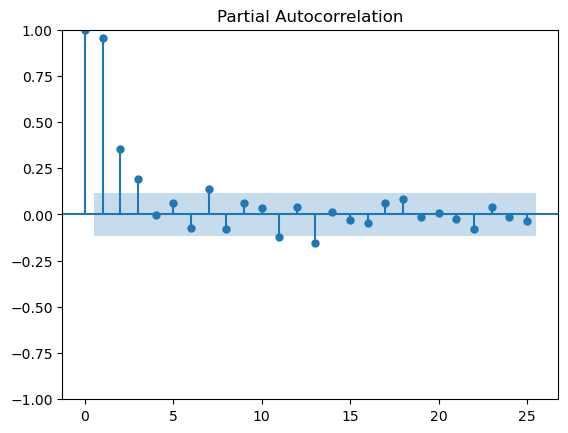

In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(tax_effect["tax_effect_of_unusual_items"])
plot_pacf(tax_effect["tax_effect_of_unusual_items"])

In [100]:
tax_df=tax_effect["tax_effect_of_unusual_items"]

In [88]:
train_data=tax_effect["tax_effect_of_unusual_items"][0:-30]
test_data=tax_effect["tax_effect_of_unusual_items"][-30:]

In [89]:
train_data

Date
2022-04-01   -92628
2022-04-02   -86829
2022-04-03   -75074
2022-04-04   -79744
2022-04-05   -93119
              ...  
2022-11-27   -21611
2022-11-28   -21473
2022-11-29   -23883
2022-11-30   -19144
2022-12-01   -24129
Name: tax_effect_of_unusual_items, Length: 245, dtype: int64

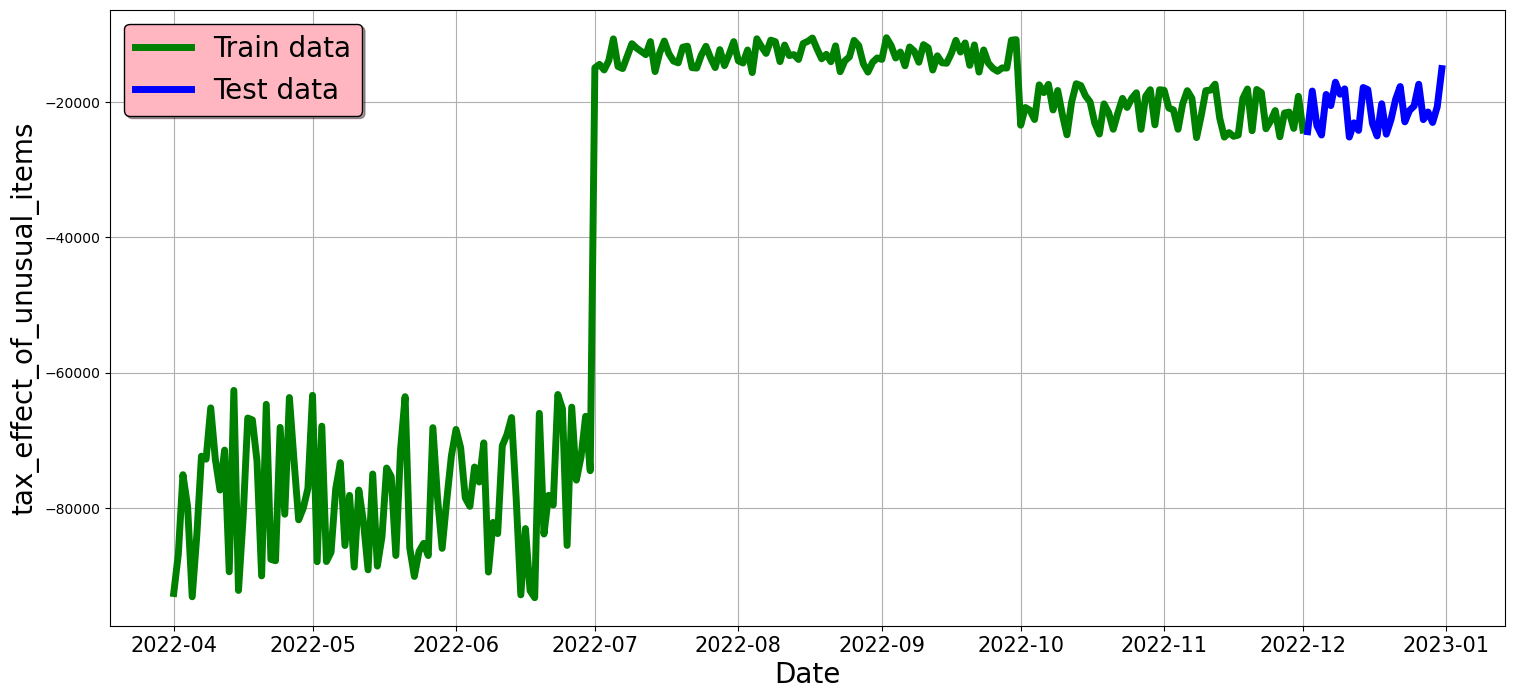

In [90]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('tax_effect_of_unusual_items', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [68]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
history=[x for x in train_data]

In [92]:
history

[-92628,
 -86829,
 -75074,
 -79744,
 -93119,
 -83990,
 -72336,
 -72778,
 -65196,
 -72797,
 -77334,
 -71438,
 -89418,
 -62615,
 -92183,
 -81452,
 -66696,
 -66978,
 -73042,
 -90031,
 -64674,
 -87583,
 -87795,
 -68081,
 -80920,
 -63668,
 -73007,
 -81741,
 -80012,
 -77110,
 -63344,
 -87933,
 -67898,
 -87905,
 -86527,
 -77188,
 -73297,
 -85540,
 -78129,
 -88728,
 -77344,
 -82052,
 -89137,
 -74976,
 -88585,
 -84260,
 -74084,
 -75350,
 -87012,
 -71508,
 -63542,
 -85885,
 -90110,
 -86438,
 -85230,
 -87020,
 -68122,
 -78467,
 -85961,
 -78825,
 -72296,
 -68387,
 -71089,
 -78512,
 -79758,
 -73939,
 -76157,
 -70370,
 -89462,
 -82132,
 -83775,
 -70791,
 -69150,
 -66627,
 -78596,
 -92839,
 -83035,
 -92209,
 -93258,
 -66007,
 -83842,
 -78124,
 -79551,
 -63219,
 -65347,
 -85527,
 -65089,
 -75876,
 -72483,
 -66447,
 -74484,
 -14935,
 -14420,
 -15245,
 -13882,
 -10657,
 -14735,
 -15040,
 -13205,
 -11368,
 -12005,
 -12493,
 -12979,
 -11058,
 -15483,
 -12731,
 -10972,
 -12865,
 -13935,
 -14199,
 -11882,
 

In [74]:
order_aic_bic = []
for p in range(6):  # Try different values for p
    model = ARIMA(history, order=(p, 1, 0))
    results = model.fit()
    aic = results.aic
    bic = results.bic
    order_aic_bic.append((p, aic, bic))

# Find the order with the lowest AIC or BIC
best_order = min(order_aic_bic, key=lambda x: np.sum(x[1:]))
print("Best Order (p) based on AIC or BIC:", best_order[0])

Best Order (p) based on AIC or BIC: 2


In [75]:
model = ARIMA(history, order=(2, 1, 0))

In [76]:
model=model.fit()

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  245
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2533.609
Date:                Mon, 25 Dec 2023   AIC                           5073.218
Time:                        12:35:54   BIC                           5083.710
Sample:                             0   HQIC                          5077.443
                                - 245                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4051      0.027    -14.819      0.000      -0.459      -0.351
ar.L2         -0.1936      0.045     -4.304      0.000      -0.282      -0.105
sigma2      5.824e+07   1.17e-10   4.97e+17      0.000    5.82e+07    5.82e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.86   Jarque-Bera (JB):              1627.19
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+35. Standard errors may be unstable.
"""

In [78]:
model.forecast()

array([-23027.36169151])

In [79]:
test_data["tax_effect_of_unusual_items"][0]

-24373

In [80]:
model.forecast()[0]

-23027.361691505932

In [81]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [82]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [84]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data["tax_effect_of_unusual_items"], test_data["tax_effect_of_unusual_items"], p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=17456.477
ARIMA(0, 0, 1) RMSE=10820.974
ARIMA(0, 0, 2) RMSE=8143.423
ARIMA(0, 1, 0) RMSE=3708.287
ARIMA(0, 1, 1) RMSE=3316.067
ARIMA(0, 1, 2) RMSE=3286.606
ARIMA(0, 2, 0) RMSE=6019.746
ARIMA(0, 2, 1) RMSE=3721.977
ARIMA(0, 2, 2) RMSE=3476.129
ARIMA(1, 0, 0) RMSE=3751.193
ARIMA(1, 0, 1) RMSE=3271.351
ARIMA(1, 0, 2) RMSE=3299.203
ARIMA(1, 1, 0) RMSE=3503.440
ARIMA(1, 1, 1) RMSE=3291.361
ARIMA(1, 1, 2) RMSE=3346.525
ARIMA(1, 2, 0) RMSE=4911.348
ARIMA(1, 2, 1) RMSE=3564.350
ARIMA(1, 2, 2) RMSE=3821.393
ARIMA(2, 0, 0) RMSE=3538.388
ARIMA(2, 0, 1) RMSE=3297.749
ARIMA(2, 0, 2) RMSE=3351.500
ARIMA(2, 1, 0) RMSE=3349.956
ARIMA(2, 1, 1) RMSE=3335.930
ARIMA(2, 1, 2) RMSE=3391.093
ARIMA(2, 2, 0) RMSE=4426.397
ARIMA(2, 2, 1) RMSE=3421.361
ARIMA(2, 2, 2) RMSE=3612.201
Best ARIMA(1, 0, 1) RMSE=3271.351


In [93]:
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(1,0,1))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
#     conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 3271.3511006091353


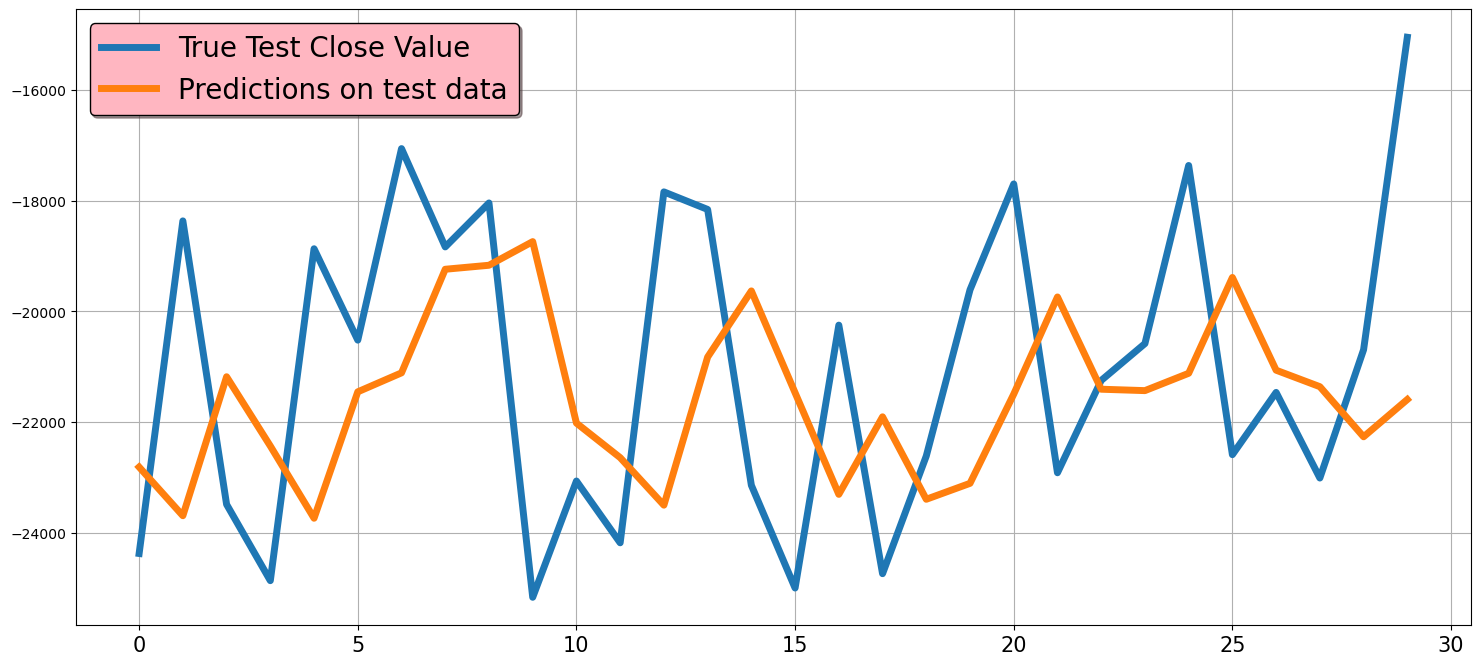

In [95]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [96]:
import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(1,0,1),seasonal_order=(1,1,1,3))
    model_fit=model.fit()
    fc=model_fit.forecast(alpha=0.05)
    predictions.append(fc)
#     conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04042D+01    |proj g|=  5.38345D-02

At iterate    5    f=  1.03306D+01    |proj g|=  9.35427D-02

At iterate   10    f=  1.03026D+01    |proj g|=  1.36665D-02

At iterate   15    f=  1.03006D+01    |proj g|=  4.74711D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   3.116D-05   1.030D+01
  F =   10.300617843682289     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  1.02991D+01    |proj g|=  2.13182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   5.427D-05   1.030D+01
  F =   10.299073574930130     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04012D+01    |proj g|=  5.36456D-02

At iterate    5    f=  1.03275D+01    |proj g|=  8.81901D-02

At iterate   10    f=  1.02998D+01    |proj g|=  1.42619D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.02979D+01    |proj g|=  2.98599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   3.120D-05   1.030D+01
  F =   10.297865096651678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03998D+01    |proj g|=  5.34324D-02

At iterate    5    f=  1.03259D+01    |proj g|=  7.86518D-02

At iterate   10    f=  1.02977D+01    |proj g|=  1.29871D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03982D+01    |proj g|=  5.34818D-02

At iterate    5    f=  1.03245D+01    |proj g|=  8.07171D-02

At iterate   10    f=  1.02965D+01    |proj g|=  1.50968D-02

At iterate   15    f=  1.02950D+01    |proj g|=  1.70752D-04

At iterate   20    f=  1.02950D+01    |proj g|=  3.25629D-04

At iterate   25    f=  1.02949D+01    |proj g|=  5.19586D-03

At iterate   30    f=  1.02921D+01    |proj g|=  4.30098D-02

At iterate   35    f=  1.02788D+01    |proj g|=  2.33306D-02

At iterate   40    f=  1.02732D+01    |proj g|=  1.97977D-03

At iterate   45    f=  1.02726D+01    |proj g|=  1.74687D-02

At iterate   50    f=  1.02691D+01    |proj g|=  2.23623D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03954D+01    |proj g|=  5.36535D-02

At iterate    5    f=  1.03221D+01    |proj g|=  8.77212D-02

At iterate   10    f=  1.02940D+01    |proj g|=  1.46067D-02

At iterate   15    f=  1.02922D+01    |proj g|=  2.25164D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   5.307D-05   1.029D+01
  F =   10.292174860487638     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.03219D+01    |proj g|=  8.63567D-02

At iterate   10    f=  1.02942D+01    |proj g|=  2.09460D-02

At iterate   15    f=  1.02917D+01    |proj g|=  5.96978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   3.862D-05   1.029D+01
  F =   10.291688027850403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03936D+01    |proj g|=  5.40161D-02


 This problem is unconstrained.



At iterate    5    f=  1.03220D+01    |proj g|=  9.91927D-02

At iterate   10    f=  1.02923D+01    |proj g|=  1.39115D-02

At iterate   15    f=  1.02902D+01    |proj g|=  1.05382D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   3.151D-05   1.029D+01
  F =   10.290217495423144     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03923D+01    |proj g|=  5.36421D-02

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   3.489D-05   1.029D+01
  F =   10.288757697270274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03922D+01    |proj g|=  5.54852D-02

At iterate    5    f=  1.03216D+01    |proj g|=  7.23030D-02

At iterate   10    f=  1.02918D+01    |proj g|=  1.21063D-02


 This problem is unconstrained.



At iterate   15    f=  1.02886D+01    |proj g|=  1.08589D-03

At iterate   20    f=  1.02885D+01    |proj g|=  3.16939D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   3.169D-05   1.029D+01
  F =   10.288528839429986     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03911D+01    |proj g|=  5.39300D-02

At iterate    5    f=  1.03169D+01    |proj g|=  1.02347D-01


 This problem is unconstrained.



At iterate   10    f=  1.02904D+01    |proj g|=  2.08013D-02

At iterate   15    f=  1.02872D+01    |proj g|=  1.27304D-03

At iterate   20    f=  1.02872D+01    |proj g|=  2.53638D-04

At iterate   25    f=  1.02872D+01    |proj g|=  4.78295D-03

At iterate   30    f=  1.02819D+01    |proj g|=  3.03108D-02

At iterate   35    f=  1.02700D+01    |proj g|=  3.36122D-03
  ys=-2.202E-03  -gs= 1.305E-03 BFGS update SKIPPED

At iterate   40    f=  1.02598D+01    |proj g|=  6.19608D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     58      1     1     0   9.452D-06   1.026D+01
  F =   10.259713369322551     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03899D+01    |proj g|=  5.40497D-02

At iterate    5    f=  1.03145D+01    |proj g|=  8.97558D-02

At iterate   10    f=  1.02881D+01    |proj g|=  1.27954D-02

At iterate   15    f=  1.02860D+01    |proj g|=  3.35017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   3.183D-05   1.029D+01
  F =   10.286013372224545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  1.02916D+01    |proj g|=  8.30086D-03

At iterate   15    f=  1.02866D+01    |proj g|=  1.45531D-02

At iterate   20    f=  1.02862D+01    |proj g|=  2.61587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.190D-05   1.029D+01
  F =   10.286176872799713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03885D+01    |proj g|=  5.69935D-02


 This problem is unconstrained.



At iterate    5    f=  1.03199D+01    |proj g|=  7.82140D-02

At iterate   10    f=  1.02901D+01    |proj g|=  7.89796D-03

At iterate   15    f=  1.02850D+01    |proj g|=  9.91847D-03

At iterate   20    f=  1.02848D+01    |proj g|=  3.19590D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   3.196D-05   1.028D+01
  F =   10.284815177863646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03871D+01    |proj g|=  5.68821D-02

At iterate    5    f=  1.03187D+01    |proj g|=  7.94742D-02

At iterate   10    f=  1.02882D+01    |proj g|=  5.59613D-03

At iterate   15    f=  1.02836D+01    |proj g|=  5.82179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   3.196D-05   1.028D+01
  F =   10.283571497254490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03862D+01    |proj g|=  5.93418D-02

At iterate    5    f=  1.03192D+01    |proj g|=  8.23859D-02

At iterate   10    f=  1.02885D+01    |proj g|=  8.90970D-03

At iterate   15    f=  1.02836D+01    |proj g|=  2.04627D-02

At iterate   20    f=  1.02827D+01    |proj g|=  3.49243D-03

At iterate   25    f=  1.02827D+01    |proj g|=  3.70143D-05

At iterate   30    f=  1.02827D+01    |proj g|=  3.94913D-03

At iterate   35    f=  1.02662D+01    |proj g|=  1.26490D-02

At iterate   40    f=  1.02642D+01    |proj g|=  1.54598D-02

At iterate   45    f=  1.02624D+01    |proj g|=  1.18004D-03

At iterate   50    f=  1.02605D+01    |proj g|=  2.83290D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.03176D+01    |proj g|=  8.34279D-02

At iterate   10    f=  1.02872D+01    |proj g|=  7.87772D-03

At iterate   15    f=  1.02822D+01    |proj g|=  2.66071D-02

At iterate   20    f=  1.02813D+01    |proj g|=  7.18219D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   3.217D-05   1.028D+01
  F =   10.281267294742312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03834D+01    |proj g|=  5.91694D-02

At iterate    5    f=  1.03160D+01    |proj g|=  8.32509D-02

At iterate   10    f=  1.02858D+01    |proj g|=  6.83964D-03

At iterate   15    f=  1.02809D+01    |proj g|=  2.33789D-02

At iterate   20    f=  1.02800D+01    |proj g|=  3.87812D-05

At iterate   25    f=  1.02799D+01    |proj g|=  3.43829D-04

At iterate   30    f=  1.02787D+01    |proj g|=  1.04236D-02

At iterate   35    f=  1.02625D+01    |proj g|=  6.05063D-02

At iterate   40    f=  1.02555D+01    |proj g|=  1.38991D-02

At iterate   45    f=  1.02522D+01    |proj g|=  4.43028D-03

At iterate   50    f=  1.02522D+01    |proj g|=  8.84093D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.03148D+01    |proj g|=  8.38490D-02

At iterate   10    f=  1.02849D+01    |proj g|=  8.17360D-03

At iterate   15    f=  1.02819D+01    |proj g|=  1.57681D-02

At iterate   20    f=  1.02786D+01    |proj g|=  6.31260D-03

At iterate   25    f=  1.02786D+01    |proj g|=  3.16020D-04

At iterate   30    f=  1.02786D+01    |proj g|=  2.52613D-03

At iterate   35    f=  1.02777D+01    |proj g|=  5.61475D-02

At iterate   40    f=  1.02546D+01    |proj g|=  6.42145D-02

At iterate   45    f=  1.02515D+01    |proj g|=  2.94000D-03

At iterate   50    f=  1.02508D+01    |proj g|=  6.95954D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03807D+01    |proj g|=  5.91707D-02

At iterate    5    f=  1.03131D+01    |proj g|=  8.45708D-02

At iterate   10    f=  1.02828D+01    |proj g|=  4.31265D-03

At iterate   15    f=  1.02781D+01    |proj g|=  9.53321D-03

At iterate   20    f=  1.02772D+01    |proj g|=  2.69918D-04

At iterate   25    f=  1.02772D+01    |proj g|=  4.91193D-04

At iterate   30    f=  1.02771D+01    |proj g|=  7.19593D-03

At iterate   35    f=  1.02714D+01    |proj g|=  8.99462D-02

At iterate   40    f=  1.02555D+01    |proj g|=  7.88137D-03

At iterate   45    f=  1.02519D+01    |proj g|=  3.44681D-02

At iterate   50    f=  1.02495D+01    |proj g|=  5.01932D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  1.02822D+01    |proj g|=  4.97277D-03

At iterate   15    f=  1.02767D+01    |proj g|=  4.76156D-03

At iterate   20    f=  1.02765D+01    |proj g|=  3.24105D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   3.241D-05   1.028D+01
  F =   10.276461949887532     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03788D+01    |proj g|=  6.02526D-02


 This problem is unconstrained.



At iterate    5    f=  1.03114D+01    |proj g|=  8.55786D-02

At iterate   10    f=  1.02809D+01    |proj g|=  4.63460D-03

At iterate   15    f=  1.02767D+01    |proj g|=  2.45915D-02

At iterate   20    f=  1.02751D+01    |proj g|=  2.80800D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.246D-05   1.028D+01
  F =   10.275122246344683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.02795D+01    |proj g|=  4.08037D-03

At iterate   15    f=  1.02744D+01    |proj g|=  2.38721D-02

At iterate   20    f=  1.02737D+01    |proj g|=  1.52468D-04

At iterate   25    f=  1.02737D+01    |proj g|=  2.01157D-03

At iterate   30    f=  1.02714D+01    |proj g|=  2.88120D-02

At iterate   35    f=  1.02539D+01    |proj g|=  1.60861D-02

At iterate   40    f=  1.02522D+01    |proj g|=  2.92534D-02

At iterate   45    f=  1.02489D+01    |proj g|=  6.63341D-02

At iterate   50    f=  1.02458D+01    |proj g|=  3.54628D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.



At iterate   20    f=  1.02723D+01    |proj g|=  1.32890D-04

At iterate   25    f=  1.02723D+01    |proj g|=  2.98271D-04

At iterate   30    f=  1.02721D+01    |proj g|=  7.00170D-03

At iterate   35    f=  1.02571D+01    |proj g|=  1.31418D-01

At iterate   40    f=  1.02444D+01    |proj g|=  1.46144D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     53      1     0     0   2.072D-05   1.024D+01
  F =   10.244387059468949     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.02773D+01    |proj g|=  1.20113D-02

At iterate   15    f=  1.02748D+01    |proj g|=  1.87534D-02

At iterate   20    f=  1.02718D+01    |proj g|=  4.54223D-03

At iterate   25    f=  1.02717D+01    |proj g|=  3.26621D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   3.266D-05   1.027D+01
  F =   10.271690162326097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  1.02708D+01    |proj g|=  2.57222D-03

At iterate   25    f=  1.02707D+01    |proj g|=  3.35479D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   3.267D-05   1.027D+01
  F =   10.270678413667643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03726D+01    |proj g|=  6.19039D-02

At iterate    5    f=  1.03064D+01    |proj g|=  8.81011D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  1.02733D+01    |proj g|=  9.48250D-03

At iterate   20    f=  1.02697D+01    |proj g|=  3.80605D-03

At iterate   25    f=  1.02692D+01    |proj g|=  1.03633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     37      1     0     0   3.273D-05   1.027D+01
  F =   10.269245416347751     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03715D+01    |proj g|=  6.28893D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  1.02681D+01    |proj g|=  1.70935D-03

At iterate   25    f=  1.02680D+01    |proj g|=  1.63497D-04

At iterate   30    f=  1.02680D+01    |proj g|=  3.43310D-03

At iterate   35    f=  1.02663D+01    |proj g|=  3.88566D-02

At iterate   40    f=  1.02550D+01    |proj g|=  1.31023D-02

At iterate   45    f=  1.02508D+01    |proj g|=  4.42929D-03

At iterate   50    f=  1.02479D+01    |proj g|=  1.22319D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   1.223D-03   1.025D+01
  F =   10.247932967841205     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  1.03039D+01    |proj g|=  9.10710D-02

At iterate   10    f=  1.02722D+01    |proj g|=  6.47891D-03

At iterate   15    f=  1.02705D+01    |proj g|=  1.76388D-02

At iterate   20    f=  1.02669D+01    |proj g|=  1.40126D-03

At iterate   25    f=  1.02667D+01    |proj g|=  3.29489D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   3.295D-05   1.027D+01
  F =   10.266700946218833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RMSE of ARIMA Model: 3267.5889342363735


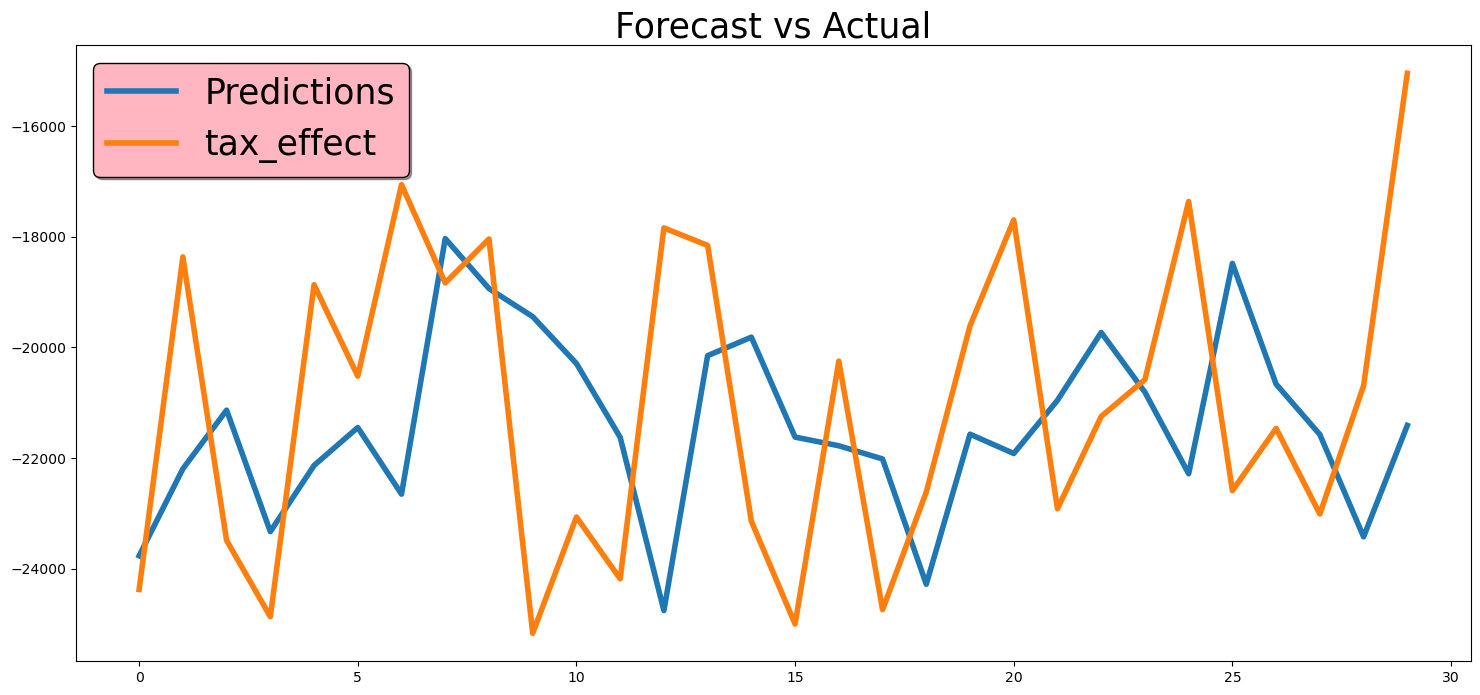

In [98]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(30), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(30), test_data, label = 'tax_effect', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

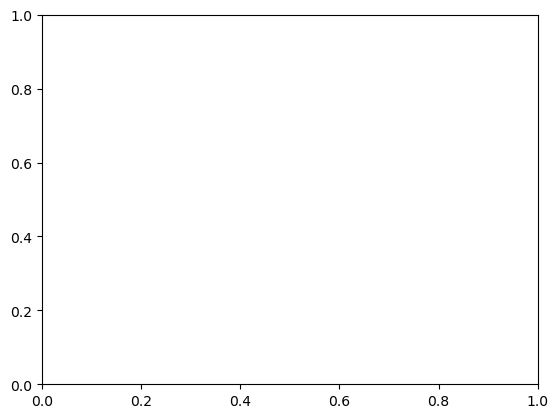

In [105]:
fig, ax1 = plt.subplots()
result=model_fit.get_prediction(start=1,end=len(tax_df)+2,ax=ax1)
confidence_interval = result.conf_int()

In [104]:
len(tax_df)

275

In [106]:
pred=result.predicted_mean

In [108]:
plt.figure()
plt.plot(tax_effect["Date"][1:len(tax_df)], label='Actual')
plt.plot(tax_effect["Date"][1:len(tax_df)+2], pred, color='red', label='Predicted')
plt.fill_between(dates[start_index:end_index], confidence_interval[:, 0], confidence_interval[:, 1], color='pink', alpha=0.05, label='Confidence Interval')
plt.legend()
plt.show()

KeyError: 'Date'

<Figure size 640x480 with 0 Axes>

In [112]:
pred

array([-20840.6493139 , -25277.7942884 , -91493.98332018, -74863.5708644 ,
       -64442.62784958, -94164.49847354, -83081.07950992, -66074.84201901,
       -78390.3593826 , -73574.91112848, -63310.18393283, -79381.70340283,
       -81749.93903272, -64122.80534574, -88975.41767991, -77668.03526586,
       -72618.08382875, -78583.79900854, -68557.01166144, -73580.24595069,
       -79353.84208411, -80285.58676936, -74726.35076562, -84380.85784395,
       -79639.61173204, -64425.70705829, -79445.59592705, -74077.98689567,
       -71694.63602168, -84619.93442685, -71803.57694179, -72639.25745315,
       -77386.43196755, -81909.72668166, -75218.93000831, -86509.66555309,
       -79307.43482892, -74166.50942312, -83021.59337167, -85556.53340682,
       -74811.30476997, -86417.873028  , -84793.864323  , -75424.59282646,
       -88900.85600174, -83204.71644401, -76379.4975514 , -82389.40470298,
       -80327.67392721, -72977.84539166, -77502.0397008 , -75750.80675359,
       -76484.52256092, -

In [114]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

In [115]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = SimpleExpSmoothing(history)
    model_fit = model.fit()
    pred = model_fit.predict()
    predictions.append(pred)
    history.append(test_data[t])
ses = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE of SES Model:', ses)


RMSE of SES Model: 3253.535296379043


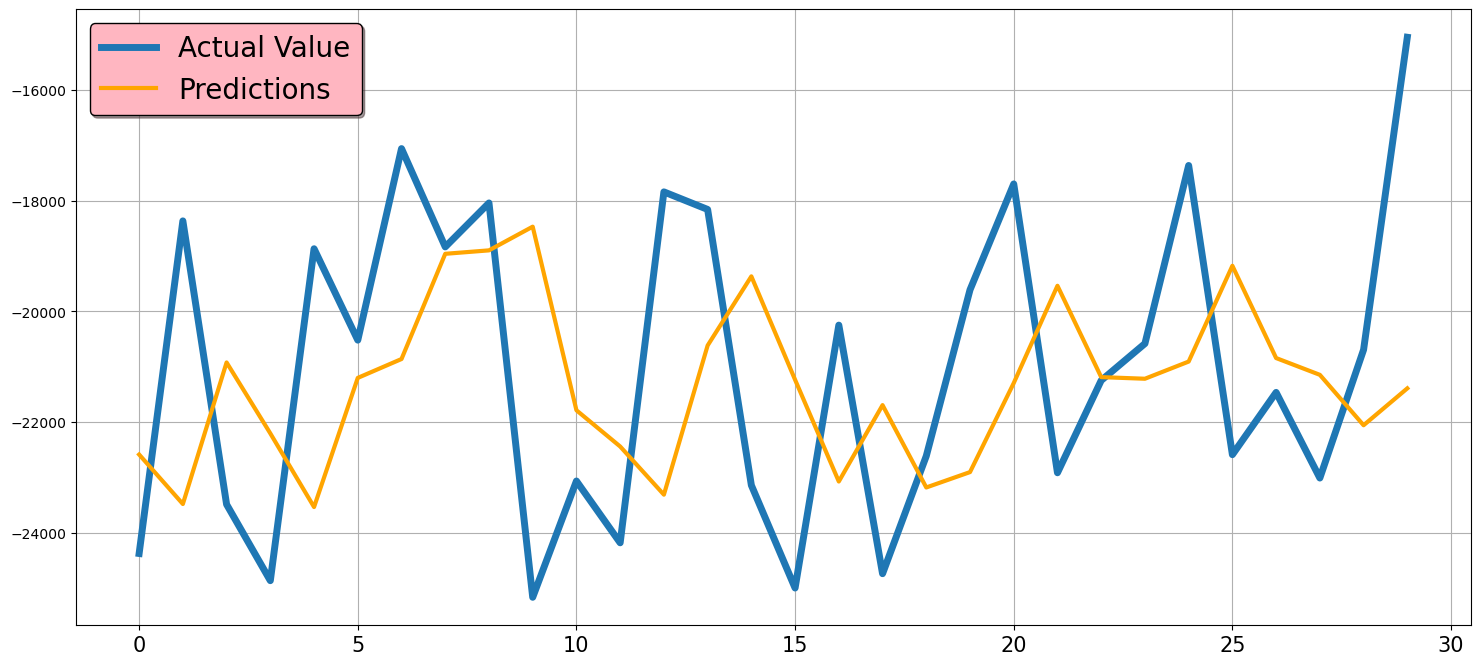

In [116]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'Actual Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [117]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = ExponentialSmoothing(history)
    model_fit = model.fit()
    pred = model_fit.predict()
    predictions.append(pred)
    history.append(test_data[t])
hwes = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE of HWES Model:', hwes)

RMSE of HWES Model: 3254.7668062072494


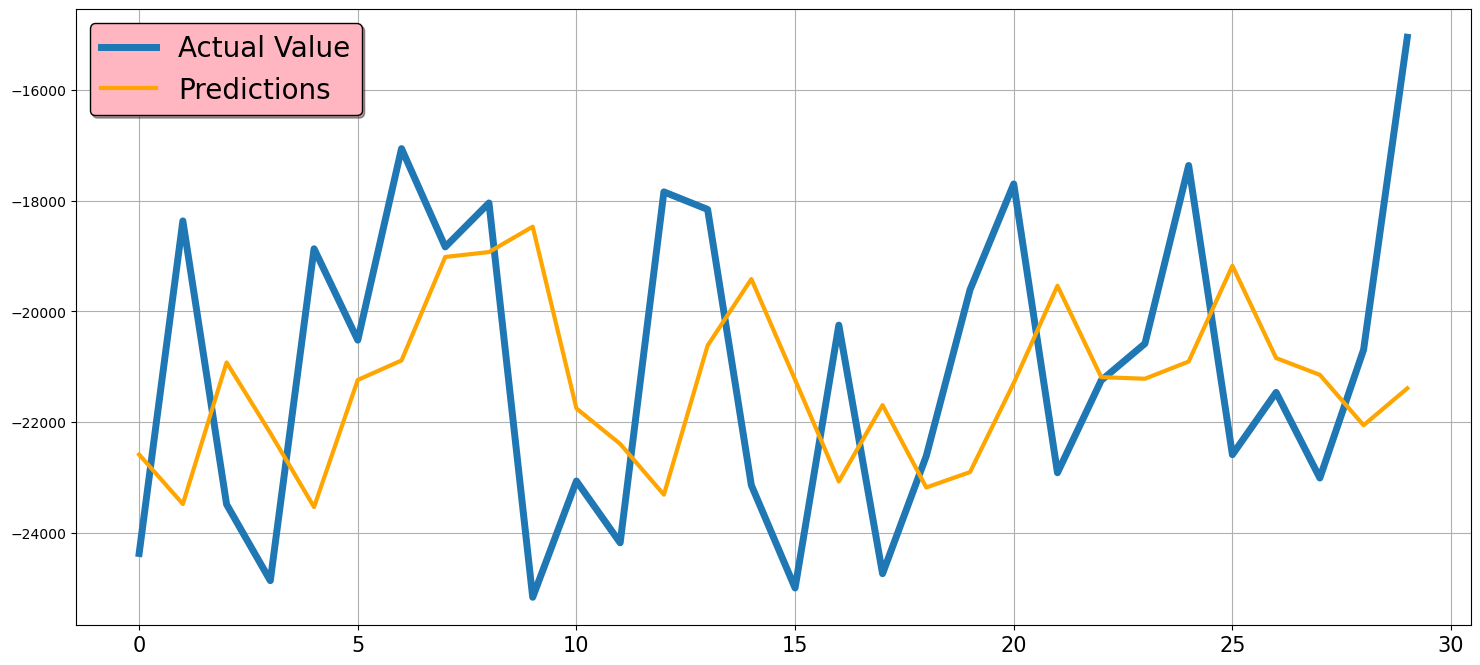

In [118]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'Actual Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()